In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("C:\\Users\\The Puter 2.0\\Documents\\msc450files\\housing_train.csv")
data

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,price
0,4306.971093,4,2,3,yes,no,no,no,yes,2,23807.622530
1,4732.863826,4,4,4,yes,no,no,no,yes,3,46173.573550
2,4989.989980,3,2,2,yes,no,yes,no,no,2,25491.220630
3,4330.127019,4,2,2,yes,no,yes,no,yes,3,18941.805220
4,4306.971093,4,1,2,yes,yes,yes,no,yes,2,17582.991230
...,...,...,...,...,...,...,...,...,...,...,...
535,2738.612788,2,1,1,yes,no,yes,no,no,2,5089.329760
536,2449.489743,3,1,1,no,no,no,no,no,0,3117.805748
537,3008.321791,2,1,1,yes,no,no,no,no,0,5225.860608
538,2697.220792,3,1,1,no,no,no,no,no,0,4667.654135


In [2]:
mainroad = pd.get_dummies(data.mainroad)
mainroad=mainroad.rename(columns = {"yes": "mainroad"}).iloc[:, 1:]
data = pd.concat([mainroad,data.drop(['mainroad'], axis=1)],axis=1)

guestroom = pd.get_dummies(data.guestroom)
guestroom=guestroom.rename(columns = {"yes": "guestroom"}).iloc[:, 1:]
data = pd.concat([guestroom,data.drop(['guestroom'], axis=1)],axis=1)

basement = pd.get_dummies(data.basement)
basement=basement.rename(columns = {"yes": "basement"}).iloc[:, 1:]
data = pd.concat([basement,data.drop(['basement'], axis=1)],axis=1)

hotwaterheating = pd.get_dummies(data.hotwaterheating)
hotwaterheating=hotwaterheating.rename(columns = {"yes": "hotwaterheating"}).iloc[:, 1:]
data = pd.concat([hotwaterheating,data.drop(['hotwaterheating'], axis=1)],axis=1)

airconditioning = pd.get_dummies(data.airconditioning)
airconditioning=airconditioning.rename(columns = {"yes": "airconditioning"}).iloc[:, 1:]
data = pd.concat([airconditioning,data.drop(['airconditioning'], axis=1)],axis=1)

data

,airconditioning,hotwaterheating,basement,guestroom,mainroad,area,bedrooms,bathrooms,stories,parking,price
0,1,0,0,0,1,4306.971093,4,2,3,2,23807.622530
1,1,0,0,0,1,4732.863826,4,4,4,3,46173.573550
2,0,0,1,0,1,4989.989980,3,2,2,2,25491.220630
3,1,0,1,0,1,4330.127019,4,2,2,3,18941.805220
4,1,0,1,1,1,4306.971093,4,1,2,2,17582.991230
...,...,...,...,...,...,...,...,...,...,...,...
535,0,0,1,0,1,2738.612788,2,1,1,2,5089.329760
536,0,0,0,0,0,2449.489743,3,1,1,0,3117.805748
537,0,0,0,0,1,3008.321791,2,1,1,0,5225.860608
538,0,0,0,0,0,2697.220792,3,1,1,0,4667.654135


In [3]:
import statsmodels.api as sm
ols = sm.OLS(data.iloc[:,10], sm.add_constant(data.iloc[:,0:10]))
lm = ols.fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     346.4
Date:                Thu, 05 Oct 2023   Prob (F-statistic):          7.67e-225
Time:                        03:07:12   Log-Likelihood:                -4935.6
No. Observations:                 540   AIC:                             9893.
Df Residuals:                     529   BIC:                             9940.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -1.99e+04    631.814    -

Text(0, 0.5, 'Residuals')

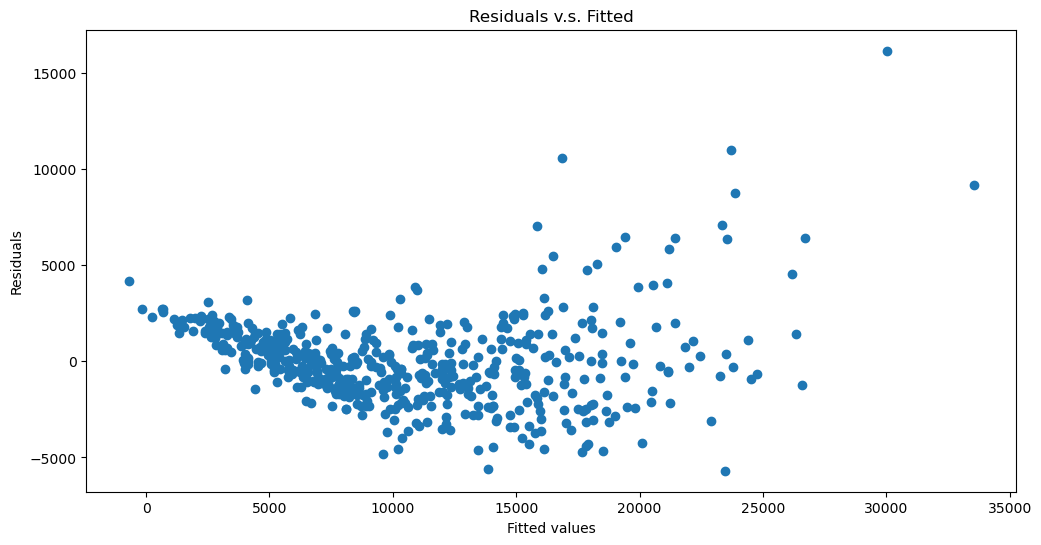

In [4]:
fitted_y = lm.fittedvalues
residual = lm.resid
plt.figure(figsize=(12,6))
plt.scatter(fitted_y,residual)
plt.title("Residuals v.s. Fitted")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

Text(0, 0.5, 'Frequency')

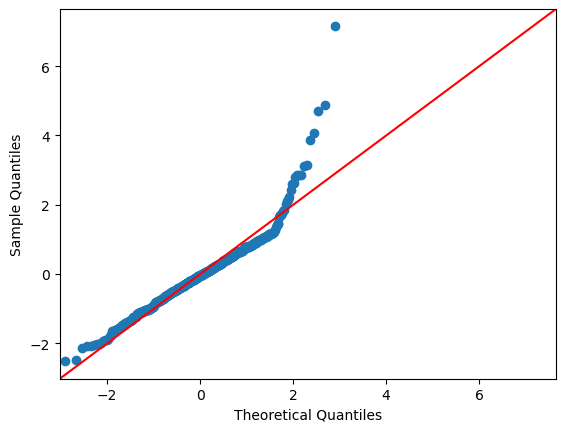

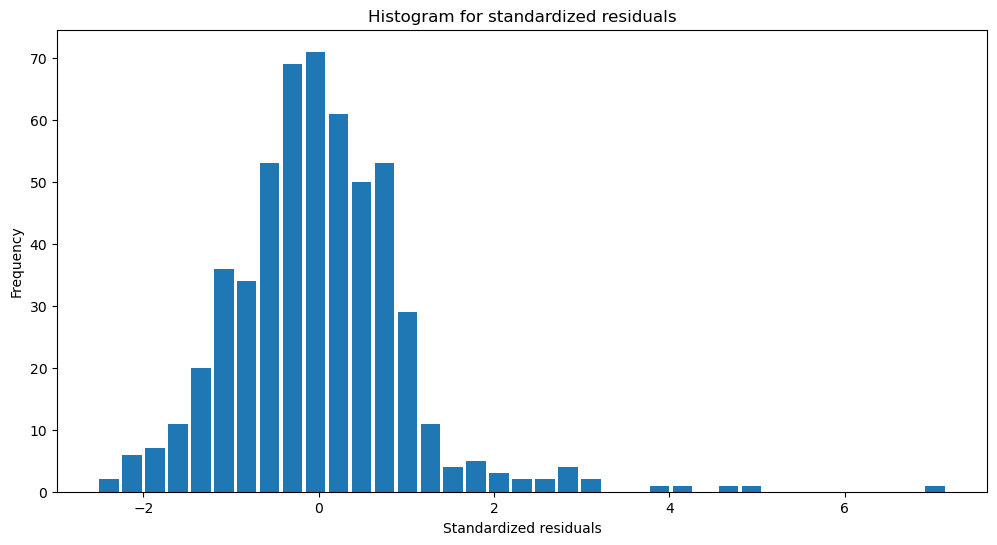

In [5]:
from sklearn.preprocessing import scale
residual_norm = scale(residual)
sm.qqplot(residual_norm, line='45')
plt.figure(figsize=(12,6))
plt.hist(x=residual_norm, bins='auto', rwidth=0.85)
plt.title('Histogram for standardized residuals')
plt.xlabel('Standardized residuals')
plt.ylabel('Frequency')

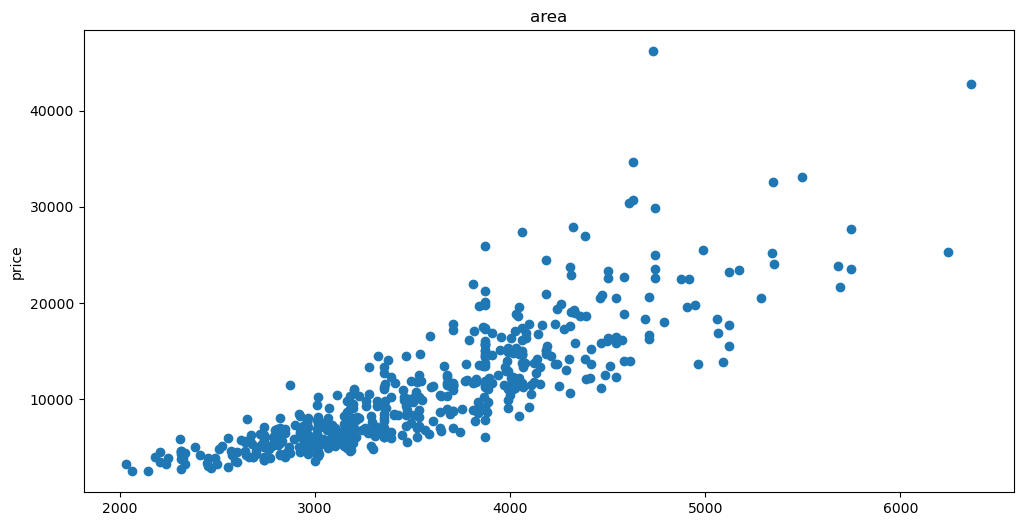

In [6]:
plt.figure(figsize=(12,6))
plt.scatter(data.area,data.price)
plt.title('area')
plt.ylabel('price')

plt.show()

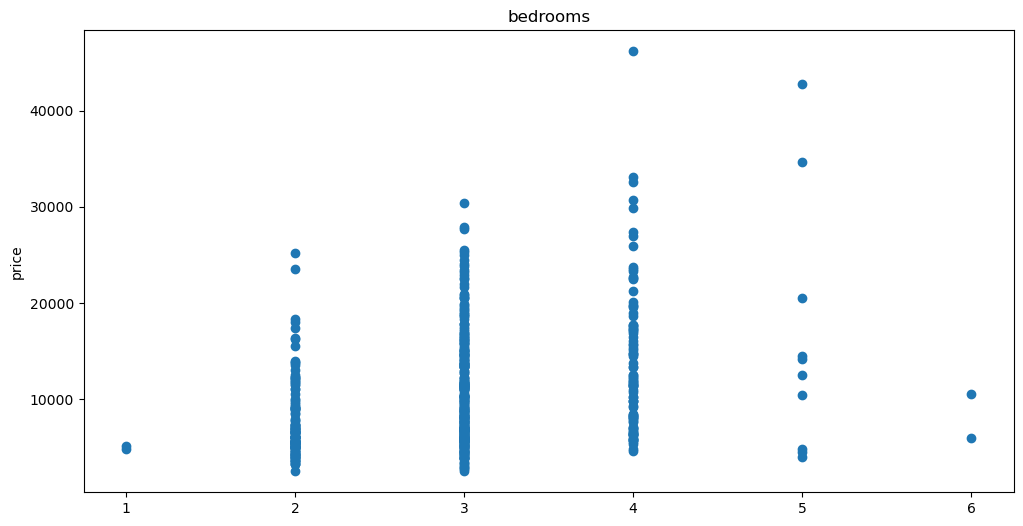

In [7]:
plt.figure(figsize=(12,6))
plt.scatter(data.bedrooms,data.price)
plt.title('bedrooms')
plt.ylabel('price')

plt.show()

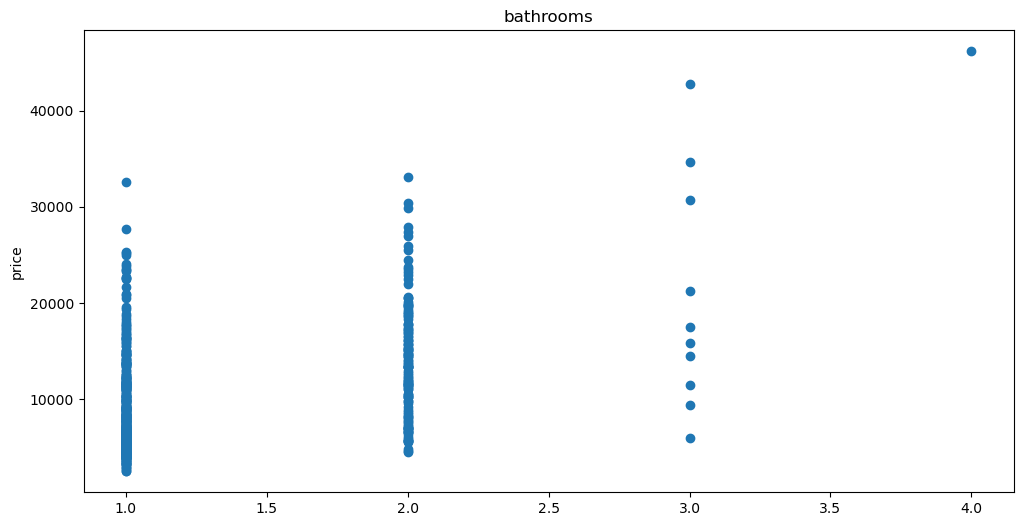

In [8]:
plt.figure(figsize=(12,6))
plt.scatter(data.bathrooms,data.price)
plt.title('bathrooms')
plt.ylabel('price')

plt.show()

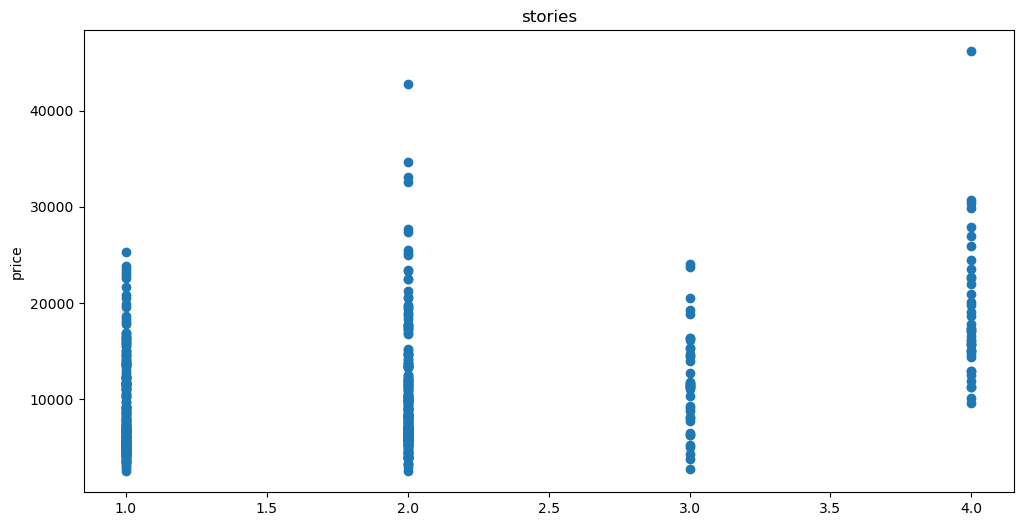

In [9]:
plt.figure(figsize=(12,6))
plt.scatter(data.stories,data.price)
plt.title('stories')
plt.ylabel('price')

plt.show()

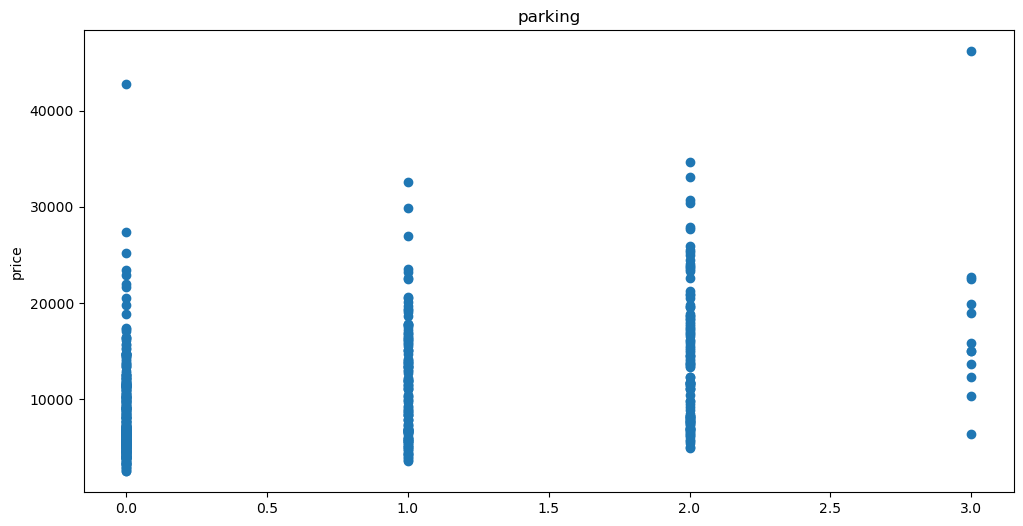

In [10]:
plt.figure(figsize=(12,6))
plt.scatter(data.parking,data.price)
plt.title('parking')
plt.ylabel('price')

plt.show()

In [11]:
price = np.log(data.iloc[:,10:])
price = price.rename(columns = {"price": "Log_price"})
data = pd.concat([price, data.iloc[:,0:10]], axis=1)
data

,Log_price,airconditioning,hotwaterheating,basement,guestroom,mainroad,area,bedrooms,bathrooms,stories,parking
0,10.077761,1,0,0,0,1,4306.971093,4,2,3,2
1,10.740163,1,0,0,0,1,4732.863826,4,4,4,3
2,10.146089,0,0,1,0,1,4989.989980,3,2,2,2
3,9.849127,1,0,1,0,1,4330.127019,4,2,2,3
4,9.774687,1,0,1,1,1,4306.971093,4,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...
535,8.534901,0,0,1,0,1,2738.612788,2,1,1,2
536,8.044885,0,0,0,0,0,2449.489743,3,1,1,0
537,8.561375,0,0,0,0,1,3008.321791,2,1,1,0
538,8.448412,0,0,0,0,0,2697.220792,3,1,1,0


In [12]:
import statsmodels.api as sm
ols = sm.OLS(data.iloc[:,0], sm.add_constant(data.iloc[:,1:]))
lm = ols.fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     537.2
Date:                Thu, 05 Oct 2023   Prob (F-statistic):          1.26e-269
Time:                        03:07:12   Log-Likelihood:                 218.62
No. Observations:                 540   AIC:                            -415.2
Df Residuals:                     529   BIC:                            -368.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.3858      0.045    1

Text(0, 0.5, 'Residuals')

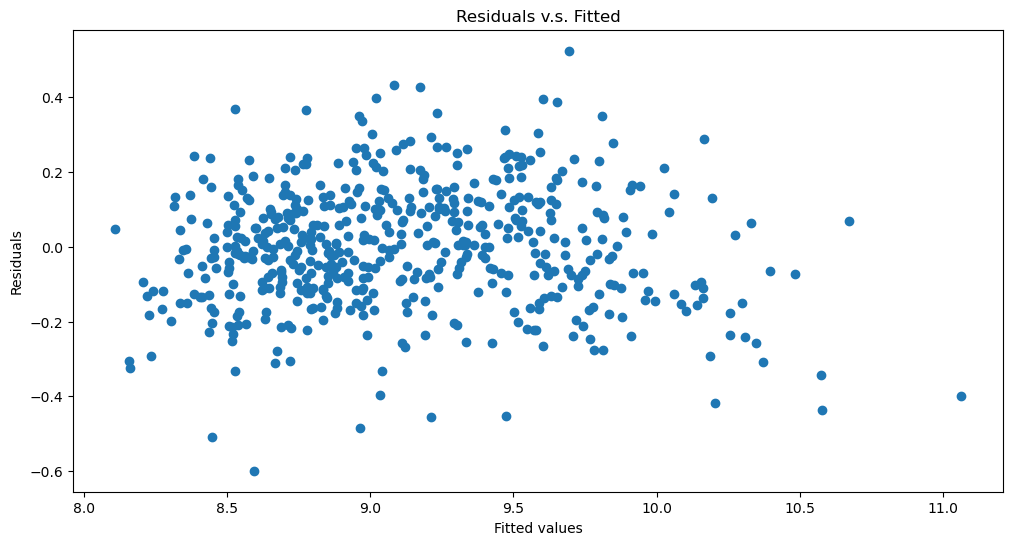

In [13]:
fitted_y = lm.fittedvalues
residual = lm.resid
plt.figure(figsize=(12,6))
plt.scatter(fitted_y,residual)
plt.title("Residuals v.s. Fitted")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

Text(0, 0.5, 'Frequency')

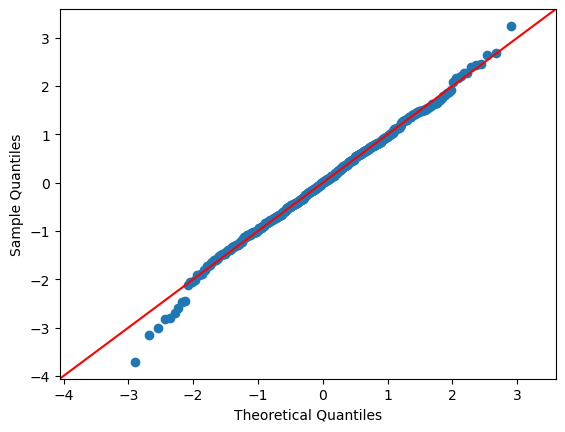

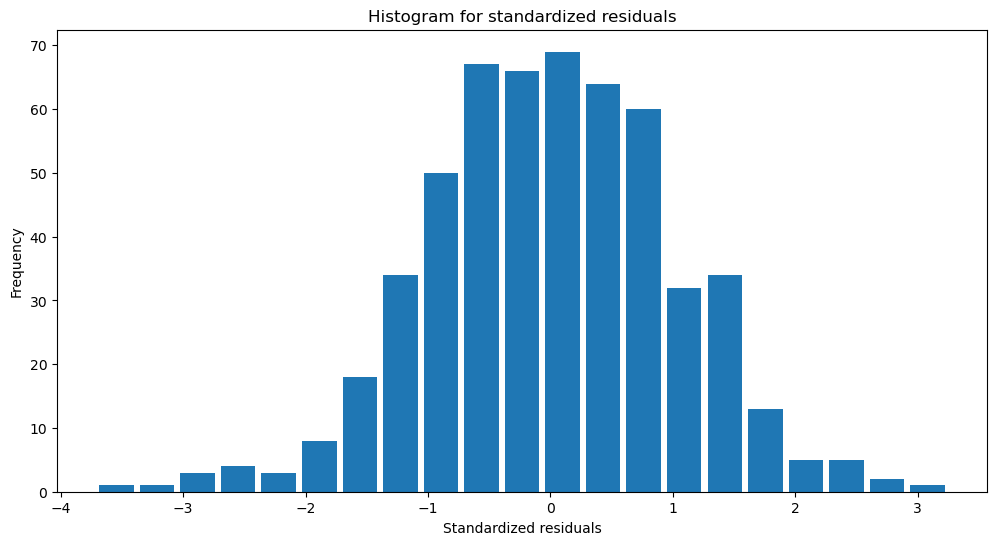

In [14]:
from sklearn.preprocessing import scale
residual_norm = scale(residual)
sm.qqplot(residual_norm, line='45')
plt.figure(figsize=(12,6))
plt.hist(x=residual_norm, bins='auto', rwidth=0.85)
plt.title('Histogram for standardized residuals')
plt.xlabel('Standardized residuals')
plt.ylabel('Frequency')

In [15]:
data[abs(residual_norm) > 3]

,Log_price,airconditioning,hotwaterheating,basement,guestroom,mainroad,area,bedrooms,bathrooms,stories,parking
157,10.219759,0,0,1,1,1,4062.019202,4,2,2,0
406,7.936753,0,0,0,0,1,2315.707235,3,1,3,0
407,7.996794,0,0,1,0,1,2554.407955,3,1,2,0
469,8.478565,0,0,0,0,0,3298.484500,4,1,2,1


In [16]:
data = data[abs(residual_norm) <= 3]

In [17]:
import statsmodels.api as sm
ols = sm.OLS(data.iloc[:,0], sm.add_constant(data.iloc[:,1:]))
lm = ols.fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     568.1
Date:                Thu, 05 Oct 2023   Prob (F-statistic):          3.89e-274
Time:                        03:07:13   Log-Likelihood:                 237.92
No. Observations:                 536   AIC:                            -453.8
Df Residuals:                     525   BIC:                            -406.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.4072      0.044    1

Text(0, 0.5, 'Residuals')

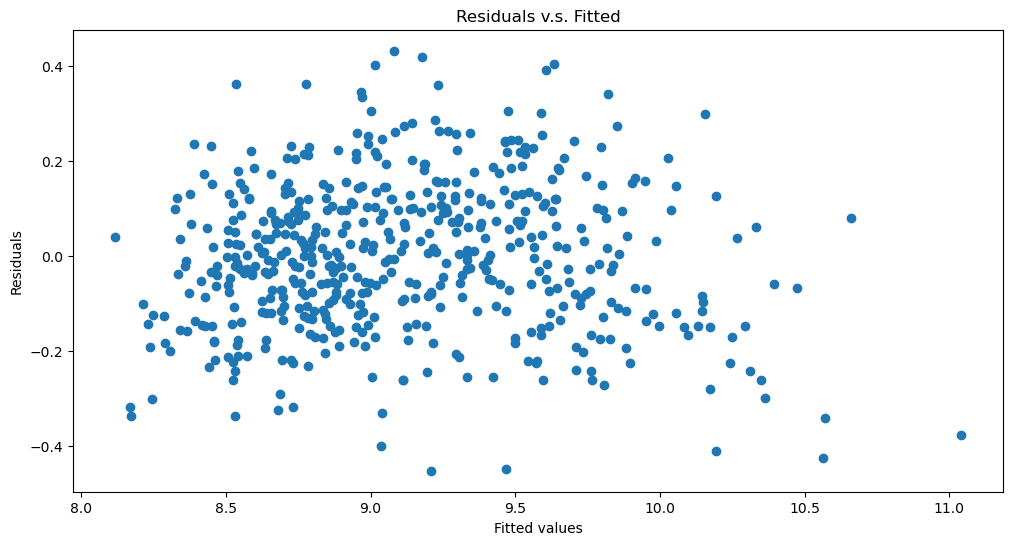

In [18]:
fitted_y = lm.fittedvalues
residual = lm.resid
plt.figure(figsize=(12,6))
plt.scatter(fitted_y,residual)
plt.title("Residuals v.s. Fitted")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

Text(0, 0.5, 'Frequency')

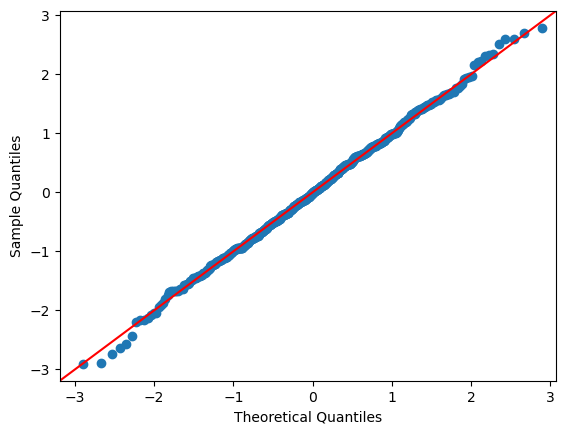

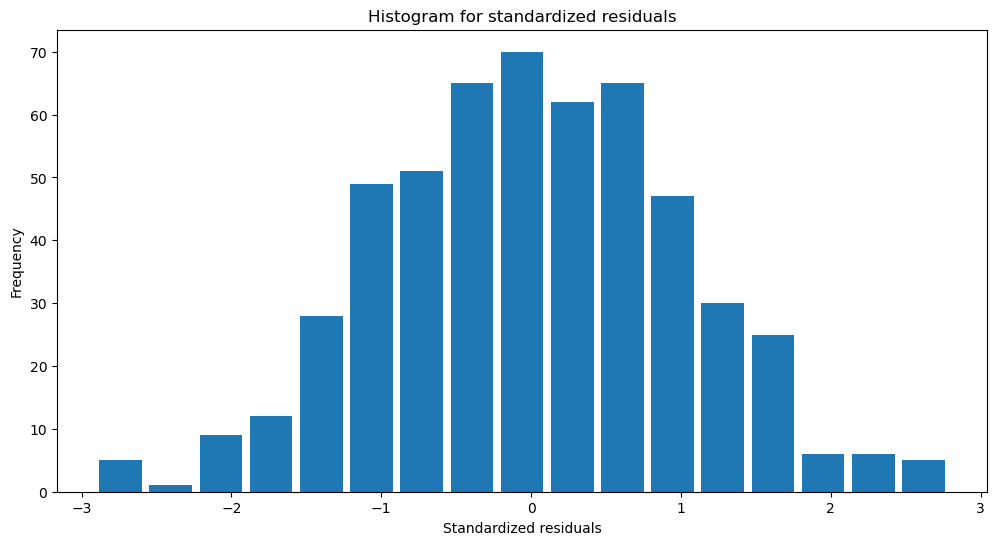

In [19]:
from sklearn.preprocessing import scale
residual_norm = scale(residual)
sm.qqplot(residual_norm, line='45')
plt.figure(figsize=(12,6))
plt.hist(x=residual_norm, bins='auto', rwidth=0.85)
plt.title('Histogram for standardized residuals')
plt.xlabel('Standardized residuals')
plt.ylabel('Frequency')

In [20]:
import itertools

def fit_lm(feature_set):
    ols = sm.OLS(data.Log_price, sm.add_constant(data[list(feature_set)]))
    lm = ols.fit()
    RSS = ((lm.predict(sm.add_constant(data[list(feature_set)])) - data.Log_price) ** 2).sum()
    rsquared_adj = lm.rsquared_adj
    AIC = lm.aic
    BIC = lm.bic
    return {"model":lm, "RSS":RSS, "Rsquared_adj": rsquared_adj, "AIC":AIC, "BIC": BIC}

def getbest(k):
    result = []
    for combo in itertools.combinations(data.columns[1:], k):
        result.append(fit_lm(combo))
    models = pd.DataFrame(result)
    best_model = models.loc[models['RSS'].argmin()]
    return best_model

In [21]:
import time
models_best = pd.DataFrame(columns=["model","RSS","Rsquared_adj","AIC","BIC"])
start = time.time()
for i in range(1,11):
    models_best.loc[i] = getbest(i)
end = time.time()
print(models_best)
print("Best subset selection takes:", end-start, "seconds")
print(models_best.loc[6, "model"].summary())

                                                model        RSS Rsquared_adj  \
1   <statsmodels.regression.linear_model.Regressio...  33.907751     0.777499   
2   <statsmodels.regression.linear_model.Regressio...  22.452601      0.85239   
3   <statsmodels.regression.linear_model.Regressio...  17.821691     0.882615   
4   <statsmodels.regression.linear_model.Regressio...  14.666735     0.903214   
5   <statsmodels.regression.linear_model.Regressio...  13.282033     0.912186   
6   <statsmodels.regression.linear_model.Regressio...  12.978212     0.914033   
7   <statsmodels.regression.linear_model.Regressio...  12.955929     0.914018   
8   <statsmodels.regression.linear_model.Regressio...  12.936246     0.913985   
9   <statsmodels.regression.linear_model.Regressio...  12.925962      0.91389   
10  <statsmodels.regression.linear_model.Regressio...  12.916146     0.913792   

           AIC         BIC  
1    45.479185   54.047453  
2  -173.479929 -160.627526  
3  -295.290663 -278.1

Text(0, 0.5, 'Residuals')

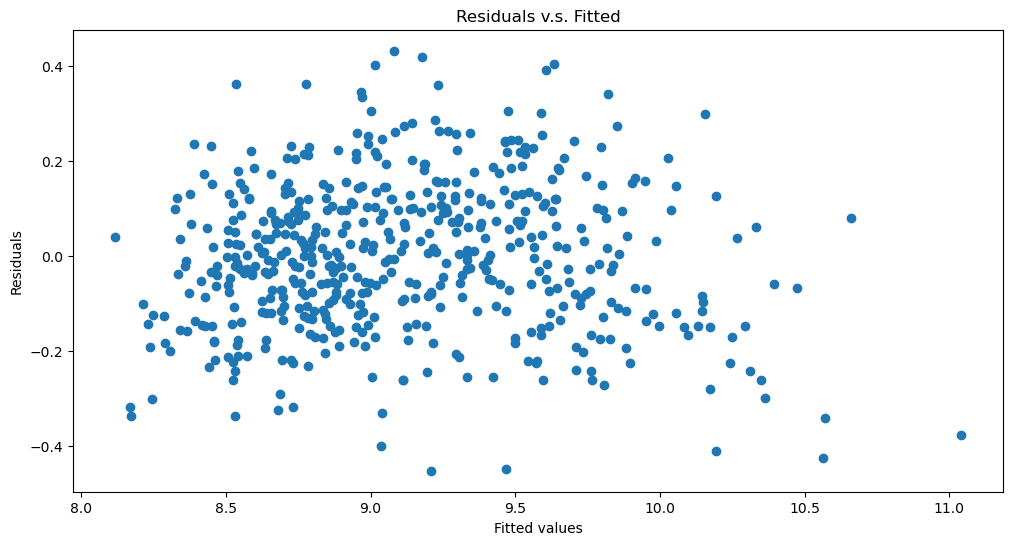

In [22]:
fitted_y = lm.fittedvalues
residual = lm.resid
plt.figure(figsize=(12,6))
plt.scatter(fitted_y,residual)
plt.title("Residuals v.s. Fitted")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

Text(0, 0.5, 'Frequency')

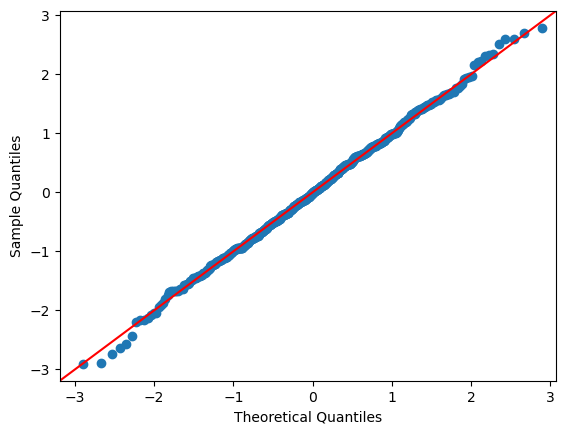

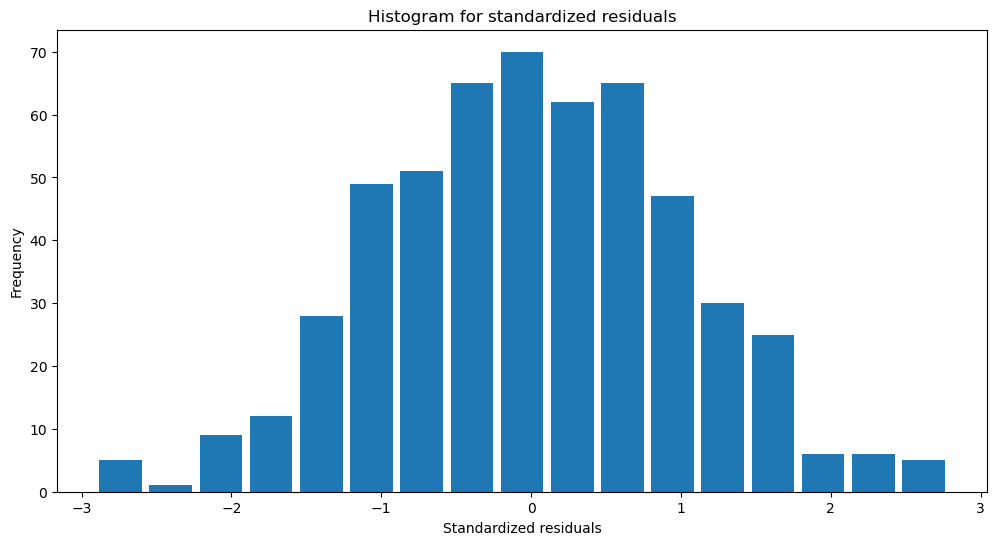

In [23]:
from sklearn.preprocessing import scale
residual_norm = scale(residual)
sm.qqplot(residual_norm, line='45')
plt.figure(figsize=(12,6))
plt.hist(x=residual_norm, bins='auto', rwidth=0.85)
plt.title('Histogram for standardized residuals')
plt.xlabel('Standardized residuals')
plt.ylabel('Frequency')

In [24]:
testData = pd.read_csv("C:\\Users\\The Puter 2.0\\Documents\\msc450files\\housing_test.csv")
testData

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,price
0,3391.164992,3,2,2,yes,yes,no,no,yes,2,13648.38942
1,4006.245125,3,2,2,yes,no,no,no,yes,1,17305.14429
2,3286.335345,3,1,2,no,no,yes,yes,no,2,10205.51922
3,4229.361654,3,2,1,yes,yes,yes,no,yes,2,17321.41596
4,4486.089611,3,1,1,yes,yes,yes,no,yes,1,15862.92477


In [25]:
mainroad = pd.get_dummies(testData.mainroad)
mainroad=mainroad.rename(columns = {"yes": "mainroad"}).iloc[:, 1:]
testData = pd.concat([mainroad,testData.drop(['mainroad'], axis=1)],axis=1)

guestroom = pd.get_dummies(testData.guestroom)
guestroom=guestroom.rename(columns = {"yes": "guestroom"}).iloc[:, 1:]
testData = pd.concat([guestroom,testData.drop(['guestroom'], axis=1)],axis=1)

basement = pd.get_dummies(testData.basement)
basement=basement.rename(columns = {"yes": "basement"}).iloc[:, 1:]
testData = pd.concat([basement,testData.drop(['basement'], axis=1)],axis=1)

hotwaterheating = pd.get_dummies(testData.hotwaterheating)
hotwaterheating=hotwaterheating.rename(columns = {"yes": "hotwaterheating"}).iloc[:, 1:]
testData = pd.concat([hotwaterheating,testData.drop(['hotwaterheating'], axis=1)],axis=1)

airconditioning = pd.get_dummies(testData.airconditioning)
airconditioning=airconditioning.rename(columns = {"yes": "airconditioning"}).iloc[:, 1:]
testData = pd.concat([airconditioning,testData.drop(['airconditioning'], axis=1)],axis=1)

testData

,airconditioning,hotwaterheating,basement,guestroom,mainroad,area,bedrooms,bathrooms,stories,parking,price
0,1,0,0,1,1,3391.164992,3,2,2,2,13648.38942
1,1,0,0,0,1,4006.245125,3,2,2,1,17305.14429
2,0,1,1,0,0,3286.335345,3,1,2,2,10205.51922
3,1,0,1,1,1,4229.361654,3,2,1,2,17321.41596
4,1,0,1,1,1,4486.089611,3,1,1,1,15862.92477


In [26]:
first_column = testData.pop('price')
testData.insert(0, 'price', first_column)
testData

,price,airconditioning,hotwaterheating,basement,guestroom,mainroad,area,bedrooms,bathrooms,stories,parking
0,13648.38942,1,0,0,1,1,3391.164992,3,2,2,2
1,17305.14429,1,0,0,0,1,4006.245125,3,2,2,1
2,10205.51922,0,1,1,0,0,3286.335345,3,1,2,2
3,17321.41596,1,0,1,1,1,4229.361654,3,2,1,2
4,15862.92477,1,0,1,1,1,4486.089611,3,1,1,1


In [27]:
from sklearn.metrics import mean_squared_error
error = []

ols = sm.OLS(data[["Log_price"]], sm.add_constant(data[["basement","area","bedrooms","bathrooms","stories","parking"]]))
lm = ols.fit()
y_pred = np.exp(lm.predict(sm.add_constant(testData[["basement","area","bedrooms","bathrooms","stories","parking"]],has_constant='add')))
error.append(mean_squared_error(y_pred,testData[["price"]]))

In [28]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     949.0
Date:                Thu, 05 Oct 2023   Prob (F-statistic):          2.03e-279
Time:                        03:07:17   Log-Likelihood:                 236.64
No. Observations:                 536   AIC:                            -459.3
Df Residuals:                     529   BIC:                            -429.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4154      0.042    153.296      0.0

In [29]:
print("Model MSE is: ", np.mean(error))

Model MSE is:  5999659.242668923
